Initial Centroids:
[[6.1 2.8]
 [5.7 3.8]
 [7.7 2.6]]

Iteration 1 Centroids:
[[6.06896552 2.82068966]
 [5.036      3.45      ]
 [7.43846154 3.13076923]]

Iteration 2 Centroids:
[[6.07777778 2.81944444]
 [5.01428571 3.33571429]
 [7.18636364 3.12727273]]

Iteration 3 Centroids:
[[6.0469697  2.81363636]
 [5.01403509 3.3122807 ]
 [7.0962963  3.11481481]]

Iteration 4 Centroids:
[[6.0296875  2.809375  ]
 [5.01403509 3.3122807 ]
 [7.06206897 3.10344828]]

Iteration 5 Centroids:
[[5.9952381  2.7952381 ]
 [5.01428571 3.33571429]
 [7.03225806 3.08709677]]

Iteration 6 Centroids:
[[5.97       2.785     ]
 [5.01428571 3.33571429]
 [6.98529412 3.07941176]]

Iteration 7 Centroids:
[[5.95517241 2.77068966]
 [5.01428571 3.33571429]
 [6.95277778 3.08611111]]

Iteration 8 Centroids:
[[5.9375     2.76428571]
 [5.01428571 3.33571429]
 [6.92631579 3.07894737]]

Iteration 9 Centroids:
[[5.93090909 2.75272727]
 [5.01428571 3.33571429]
 [6.91025641 3.08717949]]

Iteration 10 Centroids:
[[5.9        2.7240740

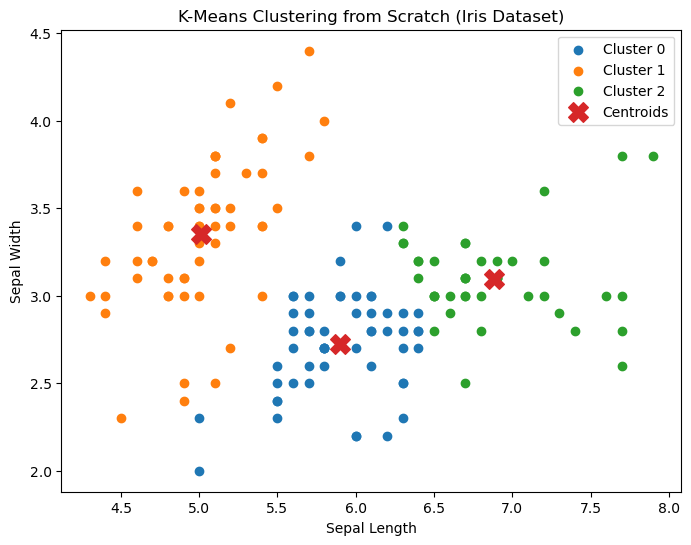

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]   # Using only sepal length & sepal width

K = 3

np.random.seed(42)
centroids = X[np.random.choice(len(X), K, replace=False)]

print("Initial Centroids:")
print(centroids)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = []
        for centroid in centroids:
            distances.append(euclidean_distance(point, centroid))
        clusters.append(np.argmin(distances))
    return np.array(clusters)

def update_centroids(X, clusters, K):
    new_centroids = []
    for k in range(K):
        points = X[clusters == k]
        new_centroids.append(points.mean(axis=0))
    return np.array(new_centroids)

max_iterations = 10

for i in range(max_iterations):
    clusters = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, clusters, K)

    print(f"\nIteration {i+1} Centroids:")
    print(new_centroids)

    # Stop if centroids do not change
    if np.allclose(centroids, new_centroids):
        print("Converged!")
        break

    centroids = new_centroids

print("\nFinal Centroids:")
print(centroids)

plt.figure(figsize=(8, 6))

for k in range(K):
    plt.scatter(
        X[clusters == k][:, 0],
        X[clusters == k][:, 1],
        label=f"Cluster {k}"
    )

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='X',
    s=200,
    label='Centroids'
)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering from Scratch (Iris Dataset)")
plt.legend()
plt.show()
